# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

# Best Learning Rate

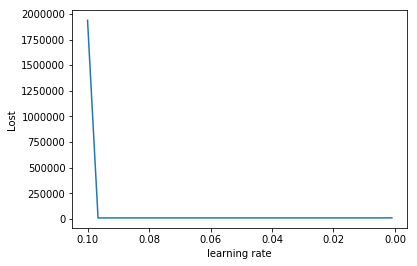

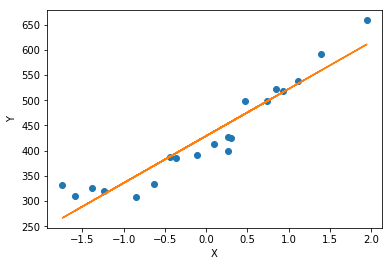

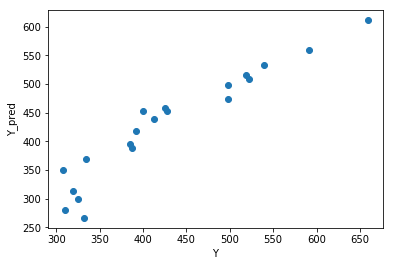

           eta         lost   theta0   theta1
0          0.1  1.93815e+06  858.276  186.812
1    0.0965862       9543.5   429.15  93.4789
2    0.0931724       9543.5   429.15  93.4788
3    0.0897586       9543.5   429.15  93.4788
4    0.0863448       9543.5   429.15  93.4788
5     0.082931       9543.5   429.15  93.4788
6    0.0795172       9543.5   429.15  93.4788
7    0.0761034       9543.5   429.15  93.4788
8    0.0726897       9543.5   429.15  93.4788
9    0.0692759       9543.5   429.15  93.4788
10   0.0658621       9543.5   429.15  93.4788
11   0.0624483       9543.5   429.15  93.4788
12   0.0590345       9543.5   429.15  93.4788
13   0.0556207       9543.5   429.15  93.4788
14   0.0522069       9543.5   429.15  93.4788
15   0.0487931       9543.5   429.15  93.4788
16   0.0453793       9543.5   429.15  93.4788
17   0.0419655       9543.5   429.15  93.4788
18   0.0385517       9543.5   429.15  93.4788
19   0.0351379       9543.5   429.15  93.4788
20   0.0317241       9543.5   429.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv(r'C:\Users\user\Desktop\machine learning\regression\regression.csv')
x=data['X']
y=data['y']

def Pred(x,theta0,theta1):
    return theta0+theta1*x

def Temp(pred,y,x,eta):
    temp0=sum(pred-y)*eta
    temp1=sum((pred-y)*x)*eta
    temp=[temp0,temp1]
    return temp

def Lost(pred,y):
    lost=0.5*sum((pred-y)**2)
    return lost

def Plot(x,y,y_pred):
    plt.figure()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.plot(x,y,'o')
    plt.plot(x,y_pred)
    plt.show()  
    plt.figure()
    plt.xlabel('Y')
    plt.ylabel('Y_pred')
    plt.plot(y,y_pred,'o')
    plt.show()

def lr_lost_plot(lr,lost):
    plt.figure()
    #unit=np.linspace(0,1200000,100)
    #plt.yticks(unit)
    plt.xlabel('learning rate')
    plt.ylabel('Lost')
    plt.plot(lr,lost)
    plt.gca().invert_xaxis()
    plt.show()

eta=np.linspace(0.1,0.001,30)
result_df=pd.DataFrame(columns=['eta','lost','theta0','theta1'],index=range(len(eta)))

for i,k in zip(eta,range(len(eta))):
    
    iteration=200
    df=pd.DataFrame(columns=['theta0','theta1','temp0','temp1','lost'],
                index=range(1,iteration+1))
    
    df.loc[1,'theta0'],df.loc[1,'theta1']=0,0
    pred=Pred(x,df.loc[1,'theta0'],df.loc[1,'theta1'])
    df.loc[1,'lost']=Lost(pred,y)
    df.loc[1,'temp0'],df.loc[1,'temp1']=Temp(pred,y,x,i)[0],Temp(pred,y,x,i)[1]
    
    iter_best=1
    lost_best=df.loc[1,'lost']
    
    for j in range(2,iteration+1):
        df.loc[j,'theta0']=df.loc[j-1,'theta0']-df.loc[j-1,'temp0']
        df.loc[j,'theta1']=df.loc[j-1,'theta1']-df.loc[j-1,'temp1']
        pred=Pred(x,df.loc[j,'theta0'],df.loc[j,'theta1'])
        df.loc[j,'lost']=Lost(pred,y)
        
        if df.loc[j,'lost'] < df.loc[j-1,'lost']:
            iter_best=j
            lost_best=df.loc[j,'lost']
            
        df.loc[j,'temp0'],df.loc[j,'temp1']=Temp(pred,y,x,i)[0],Temp(pred,y,x,i)[1]
    
    result_df.loc[k,'eta']=i
    result_df.loc[k,'lost']=lost_best
    result_df.loc[k,'theta0']=df.loc[iter_best,'theta0']
    result_df.loc[k,'theta1']=df.loc[iter_best,'theta1']

lr_lost_plot(result_df['eta'],result_df['lost'])

lost_best_lr=result_df['lost'].min()
best=result_df.loc[result_df['lost']<=lost_best_lr]

y_pred_best=Pred(x,best['theta0'].values,best['theta1'].values)

Plot(x,y,y_pred_best)
print(result_df,'\n')
print(best)

# Learning Rate=0.1

iteration:1, lost:1938623.500, theta0:858.300, theta1186.957

iteration:2, lost:1938621.104, theta0:0.000, theta10.001

iteration:3, lost:1938618.709, theta0:858.300, theta1186.955

iteration:4, lost:1938616.313, theta0:0.000, theta10.003

iteration:5, lost:1938613.918, theta0:858.300, theta1186.954

iteration:6, lost:1938611.522, theta0:0.001, theta10.004

iteration:7, lost:1938609.127, theta0:858.299, theta1186.952

iteration:8, lost:1938606.732, theta0:0.001, theta10.006

iteration:9, lost:1938604.336, theta0:858.299, theta1186.951

iteration:10, lost:1938601.941, theta0:0.001, theta10.007

iteration:11, lost:1938599.545, theta0:858.299, theta1186.950

iteration:12, lost:1938597.150, theta0:0.001, theta10.009

iteration:13, lost:1938594.755, theta0:858.299, theta1186.948

iteration:14, lost:1938592.359, theta0:0.002, theta10.010

iteration:15, lost:1938589.964, theta0:858.298, theta1186.947

iteration:16, lost:1938587.569, theta0:0.002, theta10.012

iteration:17, lost:1938585.174, t

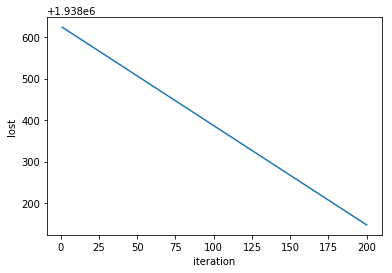

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv(r'C:\Users\user\Desktop\machine learning\regression\regression.csv')
x=data['X']
y=data['y']

def h(x,theta):
    return theta[0]+theta[1]*x

def temp(h,y,x,eta):
    temp0=sum(h-y)*eta
    temp1=sum((h-y)*x)*eta
    temp=[temp0,temp1]
    return temp

def lost(h,y):
    lost=0.5*sum((h-y)**2)
    return lost

def iter_plot(iteration,lost):
    plt.figure()
    plt.plot(iteration,lost)
    #unit=np.linspace(1938623.5,1938147.2177124699,200)
    #plt.yticks(unit)
    plt.xlabel('iteration')
    plt.ylabel('lost')
    plt.show()
    

eta=0.1
iteration=200
theta=[0,0]
lost_value=[]
for i in range(1,iteration+1):
    H=h(x,theta)
    Lost=lost(H,y)
    Temp=temp(H,y,x,eta)
    theta[0]-=Temp[0]
    theta[1]-=Temp[1]
    print('iteration:{}, lost:{:.3f}, theta0:{:.3f}, theta1{:.3f}\n'.format(i,Lost,theta[0],theta[1]))
    lost_value.append(Lost)
    
iter_plot(range(1,iteration+1),lost_value)